# LANL Earthquake Prediction
    
    1. Import libs and dataset
    2. Prepare the data
    3. Analysis of Data
    4. Feature Engineering
    5. Make a Neural Network model
    6. Fill submission file
    
# 1. Import Libs and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
import os

In [2]:
test_path='../input/test/'
# Files in test folder
len(os.listdir(test_path))

2624

In [3]:
# Load the training set
train_path='../input/train.csv'
train=pd.read_csv(train_path,dtype={'acoustic_data':np.int16,'time_to_failure':np.float32})

In [4]:
train.head(10)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691
5,8,1.4691
6,9,1.4691
7,7,1.4691
8,-5,1.4691
9,3,1.4691


# Explore the data

In [5]:
ad_sample=train.acoustic_data.values[::100]
ttf_sample=train.time_to_failure.values[::100]

# Visualize Acoustic- Time to Failure data

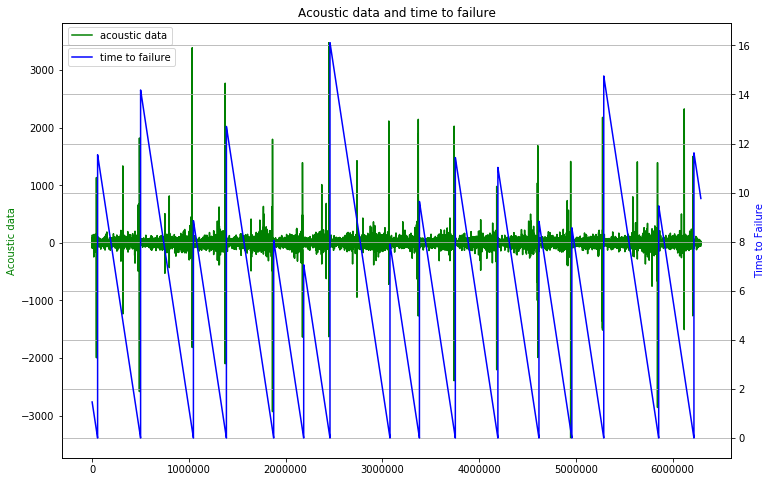

In [6]:
fig,ax1=plt.subplots(figsize=(12,8))
plt.title("Acoustic data and time to failure")
plt.plot(ad_sample,color='green')
plt.ylabel('Acoustic data',color='green')
plt.legend(['acoustic data'],loc=(0.01,0.95))
ax2=ax1.twinx()
plt.plot(ttf_sample,color='blue')
plt.ylabel('Time to Failure',color='blue')
plt.legend(['time to failure'],loc=(0.01,0.9))
plt.grid(True)

del ad_sample
del ttf_sample

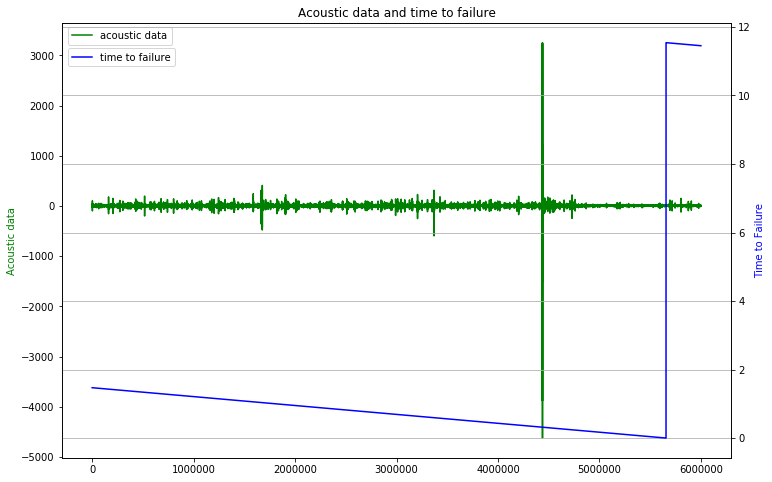

In [7]:
ad_sample=train.acoustic_data.values[:6000000]
ttf_sample=train.time_to_failure.values[:6000000]
fig,ax1=plt.subplots(figsize=(12,8))
plt.title("Acoustic data and time to failure")
plt.plot(ad_sample,color='green')
plt.ylabel('Acoustic data',color='green')
plt.legend(['acoustic data'],loc=(0.01,0.95))
ax2=ax1.twinx()
plt.plot(ttf_sample,color='blue')
plt.ylabel('Time to Failure',color='blue')
plt.legend(['time to failure'],loc=(0.01,0.9))
plt.grid(True)

del ad_sample
del ttf_sample

In [8]:
rows = 150000
segments = int(np.floor(train.shape[0] / rows))

X_train = pd.DataFrame(index = range(segments),dtype = np.float32,columns = ['mean','std','99quat','50quat','25quat','1quat'])
y_train = pd.DataFrame(index = range(segments),dtype = np.float32,columns = ['time_to_failure'])

In [9]:
for segment in tqdm(range(segments)):
    x = train.iloc[segment*rows:segment*rows+rows]
    y = x['time_to_failure'].values[-1]
    x = x['acoustic_data'].values
    X_train.loc[segment,'mean'] = np.mean(x)
    X_train.loc[segment,'std']  = np.std(x)
    X_train.loc[segment,'99quat'] = np.quantile(x,0.99)
    X_train.loc[segment,'50quat'] = np.quantile(x,0.5)
    X_train.loc[segment,'25quat'] = np.quantile(x,0.25)
    X_train.loc[segment,'1quat'] =  np.quantile(x,0.01)
    y_train.loc[segment,'time_to_failure'] = y
    

100%|██████████| 4194/4194 [00:33<00:00, 124.09it/s]


In [10]:
from keras.layers import Dense
from keras.models import Sequential 
from sklearn.preprocessing import StandardScaler
import gc
gc.collect()

Using TensorFlow backend.


0

In [11]:
model = Sequential()
model.add(Dense(32,input_shape = (6,),activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mae',optimizer = 'adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_train)
y_train=y_train.values.flatten()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
history=model.fit(X_scaler,y_train,epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
4194/4194 [==============================] - 2s 441us/step - loss: 3.8238 - acc: 0.0000e+00
Epoch 2/100
4194/4194 [==============================] - 1s 127us/step - loss: 2.2719 - acc: 0.0000e+00
Epoch 3/100
4194/4194 [==============================] - 1s 130us/step - loss: 2.2025 - acc: 0.0000e+00
Epoch 4/100
4194/4194 [==============================] - 1s 127us/step - loss: 2.1901 - acc: 0.0000e+00
Epoch 5/100
4194/4194 [==============================] - 1s 130us/step - loss: 2.1834 - acc: 0.0000e+00
Epoch 6/100
4194/4194 [==============================] - 1s 129us/step - loss: 2.1794 - acc: 0.0000e+00
Epoch 7/100
4194/4194 [==============================] - 1s 126us/step - loss: 2.1745 - acc: 0.0000e+00
Epoch 8/100
4194/4194 [==============================] - 1s 129us/step - loss: 2.1749 - acc: 0.0000e+00
Epoch 9/100
4194/4194 [==============================] - 1s 126us/step - loss: 2.1700 - acc: 0.0000e+00
Epoch 10/100
419

4194/4194 [==============================] - 1s 125us/step - loss: 2.1358 - acc: 0.0000e+00
Epoch 77/100
4194/4194 [==============================] - 1s 124us/step - loss: 2.1355 - acc: 0.0000e+00
Epoch 78/100
4194/4194 [==============================] - 1s 127us/step - loss: 2.1360 - acc: 0.0000e+00
Epoch 79/100
4194/4194 [==============================] - 1s 127us/step - loss: 2.1340 - acc: 0.0000e+00
Epoch 80/100
4194/4194 [==============================] - 1s 125us/step - loss: 2.1335 - acc: 0.0000e+00
Epoch 81/100
4194/4194 [==============================] - 1s 126us/step - loss: 2.1383 - acc: 0.0000e+00
Epoch 82/100
4194/4194 [==============================] - 1s 127us/step - loss: 2.1384 - acc: 0.0000e+00
Epoch 83/100
4194/4194 [==============================] - 1s 132us/step - loss: 2.1342 - acc: 0.0000e+00
Epoch 84/100
4194/4194 [==============================] - 1s 126us/step - loss: 2.1360 - acc: 0.0000e+00
Epoch 85/100
4194/4194 [==============================] - 1s 131us/s

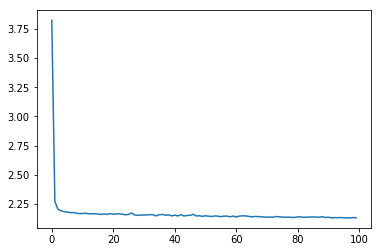

In [14]:
plt.plot(history.history['loss'])

In [15]:
sub_data = pd.read_csv('../input/sample_submission.csv',index_col = 'seg_id')
X_test = pd.DataFrame(columns = X_train.columns,dtype = np.float32,index = sub_data.index)

for seq in tqdm(X_test.index):
    test_data = pd.read_csv('../input/test/'+seq+'.csv')
    x = test_data['acoustic_data'].values
    X_test.loc[seq,'mean'] = np.mean(x)
    X_test.loc[seq,'std']  = np.std(x)
    X_test.loc[seq,'99quat'] = np.quantile(x,0.99)
    X_test.loc[seq,'50quat'] = np.quantile(x,0.5)
    X_test.loc[seq,'25quat'] = np.quantile(x,0.25)
    X_test.loc[seq,'1quat'] =  np.quantile(x,0.01)
    

100%|██████████| 2624/2624 [00:59<00:00, 45.14it/s]


In [16]:
X_test_scaler = scaler.transform(X_test)
pred = model.predict(X_test_scaler)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,time_to_failure
seg_id,
seg_00030f,0
seg_0012b5,0
seg_00184e,0
seg_003339,0
seg_0042cc,0


In [17]:
sub_data.to_csv('sub_earthquake.csv',index = False)